

## The Kaggle Notebook is a comprehensive guide that aims to demystify the complex topic of Pandas multi-indexing, stacking and unstacking, and the melt pivot function.

**The guide provides an in-depth explanation of the basics of Pandas indexing, including single indexing and hierarchical indexing. It then delves into the concept of multi-indexing, where a single column of a DataFrame can have multiple levels of indexing. The guide provides step-by-step examples of how to create, manipulate, and select data from multi-indexed DataFrames using the Pandas library.**

**Next, the guide covers the concepts of stacking and unstacking, which are methods for reformatting a multi-indexed DataFrame into a more manageable format. Stacking refers to the process of converting the innermost level of a multi-index into column headers, while unstacking does the opposite, converting the column headers into the innermost level of the multi-index. The guide provides detailed examples of how to use these methods with Pandas, and discusses the benefits and drawbacks of each approach.**

**Finally, the guide covers the melt function, which is a powerful method for transforming a DataFrame from a wide format to a long format. The guide provides a step-by-step guide to using the melt function with Pandas, including how to specify the id variables and value variables and the pivot function, which transforming a DataFrame from a long format to a wide format.**

In [1]:
import numpy as np 
import pandas as pd  

### Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

In [2]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a 

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [3]:
# However, it is very limited

a[('ece', 2021)]     # working fine

7

In [4]:
a['ece']  # it will give error -- The Problem

KeyError: 'ece'

In [6]:
# The solution -> multiindex series(also known as Hierarchical Indexing)
# multiple index levels within a single index 

In [7]:
# how to create multiindex object

# 1. pd.MultiIndex.from_tuples()
multi_1 = pd.MultiIndex.from_tuples([('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)])
multi_1 

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [8]:
# 2. pd.MultiIndex.from_product() ---> perform cartesian product of lists
multi_2 = pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]]) 
multi_2 

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [9]:
# levels inside the indexes 

print(multi_2.levels[0])    
print(multi_2.levels[1])    

Index(['cse', 'ece'], dtype='object')
Int64Index([2019, 2020, 2021, 2022], dtype='int64')


In [10]:
# Creating a series with MultiIndex objects -- Multi Index series
s1 = pd.Series([1,3,2,4,5,6,12,49], index=multi_1) 
s1 

cse  2019     1
     2020     3
     2021     2
     2022     4
ece  2019     5
     2020     6
     2021    12
     2022    49
dtype: int64

In [11]:
# How to fetch data from series 
s1[('cse',2020)] 

3

In [12]:
s1['cse']  # now we are fetching it easily

2019    1
2020    3
2021    2
2022    4
dtype: int64

### a logical question to ask
- MultiInndex objects are 2d (Require 2 piece of information to fetch the single data) 
- While DataFrame is also 2d, (What is a relationship between them) 
- Question- Why would we use MultiIndex Series

### Relationship 

In [13]:

# We convert MultiIndex series to DataFrame ---  convert rows to columns
# unstack 
x = s1.unstack() 
x 

,2019,2020,2021,2022
cse,1,3,2,4
ece,5,6,12,49


In [14]:
# Convert the DataFrame to MultiIndex object - convert column to rows
x.stack() 

cse  2019     1
     2020     3
     2021     2
     2022     4
ece  2019     5
     2020     6
     2021    12
     2022    49
dtype: int64

### Answer 
- In MultiIndex Series - represent 2d data in 1 d 
- In MultiIndex DataFrame - represent 3d data in 2 d 
- If we extend this concept to bigger levels 
> we can represent the any high dimensional data into smaller dimension or DataFrame 
                             -- Thats true power of MultiIndexing and pandas. 

In [15]:
# MultiIndex DataFrame 
d1 = pd.DataFrame([[2,4],[42,14],[78,11],[77,42],[9,21],[62,14],[32,74],[92,40]], index=multi_1, columns=['Package','student'])
d1 

Package  student
cse 2019        2        4
    2020       42       14
    2021       78       11
    2022       77       42
ece 2019        9       21
    2020       62       14
    2021       32       74
    2022       92       40

In [16]:
d1.loc[('cse',2019)]  

Package    2
student    4
Name: (cse, 2019), dtype: int64

In [17]:
d1.loc['cse',] 

,Package,student
2019,2,4
2020,42,14
2021,78,11
2022,77,42


In [18]:
# Gnerally pandas rows and column in a same manner -- 
# we also add heirarichy in columns (or multi indexing in column )
# multiindex df from columns perspective 
df3d = pd.DataFrame(
    [[1,4,22,7],[77,54,2,11],[28,91,22,88],[10,40,3,70]],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg package','student']])
) 
df3d 

delhi              mumbai        
     avg package student avg package student
2019           1       4          22       7
2020          77      54           2      11
2021          28      91          22      88
2022          10      40           3      70

In [19]:
df3d['delhi']['student'] 

2019     4
2020    54
2021    91
2022    40
Name: student, dtype: int64

In [20]:
df3d['delhi'] 

,avg package,student
2019,1,4
2020,77,54
2021,28,91
2022,10,40


In [21]:
df3d.iloc[0] 

delhi   avg package     1
        student         4
mumbai  avg package    22
        student         7
Name: 2019, dtype: int64

In [22]:
# multi indexing in both index and columns 
df4d = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,76],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multi_1,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']]))  
df4d 

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0       76
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [23]:
df4d.loc[('cse',2019),('delhi','students')]  

2

In [24]:
df4d.loc[('cse',2019)] 

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: (cse, 2019), dtype: int64

In [25]:
df4d['mumbai']

avg_package  students
cse 2019            0         0
    2020            0         0
    2021            0         0
    2022            0         0
ece 2019            0        76
    2020            0         0
    2021            0         0
    2022            0         0

## stacking and unstacking
### stack : convert columns to index, if there is already index present, then make it multi index by one more level 
### unstack : convert index to columns, if there is already column present, then make it multi index in column by one more level
- both work untill column or index get finished

In [26]:
df4d.stack()

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10      76
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [27]:
df4d.stack().stack()

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai    76
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

In [28]:
df4d.stack().stack().unstack() 

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10      76
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [29]:
df4d.stack().stack().unstack().unstack() 

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0       76
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [30]:
df4d.stack().stack().unstack().unstack().unstack() 

delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           1    3    5    7        2    4    6    8           0    0    0   
ece           9   11   13   15       10   12   14   16           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    0        0    0    0    0  
ece    0       76    0    0    0

In [31]:
df4d.stack().stack().unstack().unstack().unstack().unstack() 

delhi   avg_package  2019  cse     1
                           ece     9
                     2020  cse     3
                           ece    11
                     2021  cse     5
                           ece    13
                     2022  cse     7
                           ece    15
        students     2019  cse     2
                           ece    10
                     2020  cse     4
                           ece    12
                     2021  cse     6
                           ece    14
                     2022  cse     8
                           ece    16
mumbai  avg_package  2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
        students     2019  cse     0
                           ece    76
                     2020  cse     0
 

## Working with multi-index dataframe

In [32]:
# head
print(df4d.head(2)) 
print("-"*60)

# sample
print(df4d.sample()) 
print("-"*60)

# shape 
print(df4d.shape) 
print("-"*60)

# info 
print(df4d.info())
print("-"*60)

print(df4d.unstack().info())
print("-"*60)

print(df4d.isnull()) 
print("-"*60) 

print(df4d.duplicated())  

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
------------------------------------------------------------
               delhi               mumbai         
         avg_package students avg_package students
ece 2021          13       14           0        0
------------------------------------------------------------
(8, 4)
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage

In [33]:
# Extracting alternate rows 
df4d.iloc[::2] 

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0       76
    2021          13       14           0        0

In [34]:
# extracying columns 
df4d.loc[:,[('delhi','avg_package'),('mumbai','students')]] 

delhi   mumbai
         avg_package students
cse 2019           1        0
    2020           3        0
    2021           5        0
    2022           7        0
ece 2019           9       76
    2020          11        0
    2021          13        0
    2022          15        0

In [ ]:
# extract both rows and columns 
df4d.iloc[0,0] 

In [ ]:
# Extracting alternative rows and columns  
df4d.iloc[::2,::2]  

In [ ]:
# sort index 

# sorting for both the levels
df4d.sort_index(ascending=False) 

# sorting for both the levels but order is different
df4d.sort_index(ascending=[False,True]) 

# sorting for level zero
df4d.sort_index(level=0,ascending=False)  

# sorting for level one
df4d.sort_index(level=1,ascending=False) 

In [ ]:
# transpose 
df4d.transpose() 

In [ ]:
# swap level 

# od index 
df4d.swaplevel() 

# of columns 
df4d.swaplevel(axis=1)   

### Long Vs Wide Data
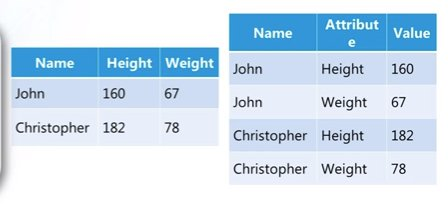

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

### **melt( )** - convert wide to long format 

In [ ]:
# branch with year
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}) 

In [ ]:
# conversion 
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt()  

In [ ]:
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='Branch',value_name='students') 

In [ ]:
new = pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)
new 

In [ ]:
new.melt() # output is messy, we don't want conversion of branch 

In [ ]:
# Now it exclude the branch column 
new.melt(id_vars=['branch'], var_name='year',value_name='students')   

In [ ]:
# melt real world example 
confirm = pd.read_csv("/kaggle/input/covid-private/time_series_covid19_confirmed_global.csv")
death = pd.read_csv('/kaggle/input/covid-private/time_series_covid19_deaths_global.csv') 

In [ ]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='deaths').head(10000)  
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='cases').head(10000)   

In [ ]:
death

In [ ]:
death.merge(confirm, on='Country/Region')[['Country/Region','date_x','cases','deaths']] 

In [ ]:
death.iloc[:,].melt(id_vars=[])

### **pivot table( )** - The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
**Generally Work with categorical data** 
- summary function. which can provide the summary of multi-dimensional data (however we can do it by using groupby and unstack as well)

In [3]:
import seaborn as sns 

In [6]:
tips = sns.load_dataset('tips')
tips.head()  

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# total avg bill on the basis of gender 
tips.groupby('sex')['total_bill'].mean() 

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [12]:
x = tips.groupby(['sex','smoker'])[['total_bill']].mean() 
x 

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [13]:
x.unstack() 

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [14]:
# Same thing will be done by pivot_table() function -- easily 
tips.pivot_table(index='sex',columns='smoker',values='total_bill')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [15]:
# agg function 
tips.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count') 

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [16]:
# all cols together 
# if we don;t pass any values, then it will apply for every numerical column
tips.pivot_table(index='sex',columns='smoker') 

size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [17]:
tips.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [18]:
# for all
tips.pivot_table(index=['sex','smoker'],columns=['day','time'])

size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [19]:
# diff aggregate func on different values 
tips.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'count', 'total_bill':'sum'})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000    10   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721    20   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000     7   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429    24   

                                   ...              total_bill                \
day                    Fri         ...   Sun              Thur           Fri   
time          Dinner Lunch Dinner  ... Lunch Dinner      Lunch Dinner  Lunch   
sex    smoker                      ...                                         
Male   Yes         0     3      5  ...     0     15     191.71   0.00  34.16   
       No          0     0      2  ...     0     43     369.73   0.00   0.00   
Female Yes         0     3      4  ...     0      4     134.53   0.00  39.78   
       No          1     1      1  ...     0     14     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54  

[4 rows x 22 columns]

In [21]:
# margins  - just to see the total 
tips.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum', margins=True)  

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [23]:
exp = pd.read_csv('/kaggle/input/daily-expenses/Daily Expenses.csv') 
exp 

,Date,Time,Remark,Category,Mode,Cash In,Cash Out,Balance
0,01 Mar 2022,12:00 AM,Budget,Money,Online,5000.0,NaN,5000
1,02 Mar 2022,06:00 PM,Cashback,Bonus,Google Pay,5.0,NaN,5005
2,04 Mar 2022,08:00 PM,Cashback,Bonus,Paytm,100.0,NaN,5105
3,19 Mar 2022,08:00 AM,Bhel,Food,Cash,NaN,50.0,5055
4,19 Mar 2022,09:15 AM,"Sinnar to Shivaji Nagar, Pune",Travel,Cash,NaN,260.0,4795
...,...,...,...,...,...,...,...,...
559,25 Sep 2022,08:30 PM,Masala Cut Dosa,Food,Google Pay,NaN,45.0,340
560,26 Sep 2022,09:30 AM,Tea ☕,Drink,Amazon Pay,NaN,10.0,330
561,26 Sep 2022,05:00 PM,Tea ☕,Drink,Google Pay,NaN,10.0,320
562,27 Sep 2022,10:00 AM,Breakfast,Food,Google Pay,NaN,25.0,295


In [24]:
exp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      564 non-null    object 
 1   Time      564 non-null    object 
 2   Remark    564 non-null    object 
 3   Category  564 non-null    object 
 4   Mode      564 non-null    object 
 5   Cash In   50 non-null     float64
 6   Cash Out  514 non-null    float64
 7   Balance   564 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 35.4+ KB


In [26]:
exp['Date'] = pd.to_datetime(exp['Date'])  

In [29]:
exp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      564 non-null    datetime64[ns]
 1   Time      564 non-null    object        
 2   Remark    564 non-null    object        
 3   Category  564 non-null    object        
 4   Mode      564 non-null    object        
 5   Cash In   50 non-null     float64       
 6   Cash Out  514 non-null    float64       
 7   Balance   564 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.4+ KB


In [39]:
exp['Month'] = exp['Date'].dt.month_name()  
exp 

,Date,Time,Remark,Category,Mode,Cash In,Cash Out,Balance,Month
0,2022-03-01,12:00 AM,Budget,Money,Online,5000.0,NaN,5000,March
1,2022-03-02,06:00 PM,Cashback,Bonus,Google Pay,5.0,NaN,5005,March
2,2022-03-04,08:00 PM,Cashback,Bonus,Paytm,100.0,NaN,5105,March
3,2022-03-19,08:00 AM,Bhel,Food,Cash,NaN,50.0,5055,March
4,2022-03-19,09:15 AM,"Sinnar to Shivaji Nagar, Pune",Travel,Cash,NaN,260.0,4795,March
...,...,...,...,...,...,...,...,...,...
559,2022-09-25,08:30 PM,Masala Cut Dosa,Food,Google Pay,NaN,45.0,340,September
560,2022-09-26,09:30 AM,Tea ☕,Drink,Amazon Pay,NaN,10.0,330,September
561,2022-09-26,05:00 PM,Tea ☕,Drink,Google Pay,NaN,10.0,320,September
562,2022-09-27,10:00 AM,Breakfast,Food,Google Pay,NaN,25.0,295,September


<AxesSubplot:xlabel='Month'>

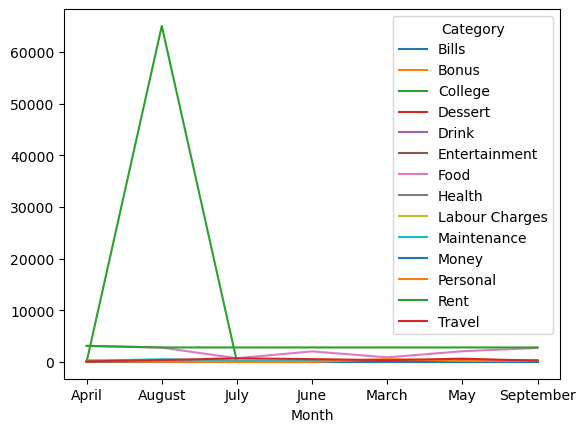

In [46]:
exp.pivot_table(index='Month',columns = 'Category', values='Cash Out', aggfunc='sum', fill_value=0).plot()  

<AxesSubplot:xlabel='Month'>

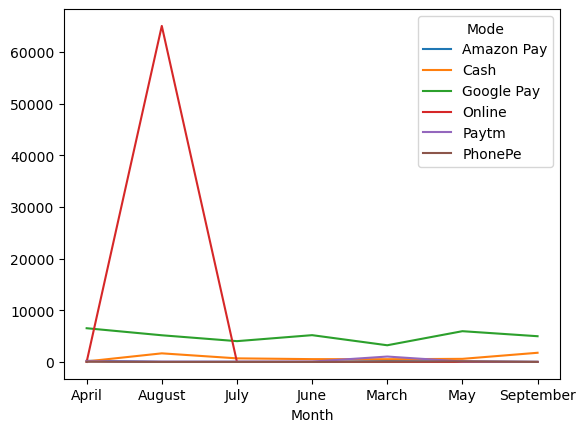

In [48]:
exp.pivot_table(index='Month',columns = 'Mode', values='Cash Out', aggfunc='sum', fill_value=0).plot()  